<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/Coursework_2_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import imageio
#Import data from drive
from google.colab import drive


In [69]:
path= '/content/drive/MyDrive/Link_2/List/file_list.mat'
path_train= '/content/drive/MyDrive/Link_2/List/train_list.mat'
path_test= '/content/drive/MyDrive/Link_2/List/test_list.mat'

In [70]:
import scipy.io
data = scipy.io.loadmat(path)

In [71]:
df = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
list1 = []
for i in data:
  if '__' not in i and 'readme' not in i:
    data_array = data[i]
    if df.empty:
      df = pd.DataFrame(data_array)

    elif df1.empty:
      df1 = pd.DataFrame(data_array)
    else:
      df2 = pd.DataFrame(data_array)

frames = [df, df2]

full_list = pd.concat(frames, axis=1)

#train_list = df
full_list.columns = ['File', 'Index']

full_list['File'] = full_list['File'].astype(str)
full_list['Breed'] = full_list['File'].str.split('-').str[1]
full_list['Breed'] = full_list['Breed'].str.split('/').str[0]

full_list['File'] = full_list['File'].str.split('[').str[1]
full_list['File'] = full_list['File'].str.split(']').str[0]
full_list['File'] = full_list['File'].str.strip("'")

In [72]:
data = scipy.io.loadmat(path_train)

df = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
list1 = []

for i in data:
  if '__' not in i and 'readme' not in i:
    data_array = data[i]
    if df.empty:
      df = pd.DataFrame(data_array)
      list1.append(str(data_array).split("-"))

    elif df1.empty:
      df1 = pd.DataFrame(data_array)
    else:
      df2 = pd.DataFrame(data_array)

frames = [df, df2]

train_list = pd.concat(frames, axis=1)

#train_list = df
train_list.columns = ['File', 'Index']

train_list['File'] = train_list['File'].astype(str)
train_list['Breed'] = train_list['File'].str.split('-').str[1]
train_list['Breed'] = train_list['Breed'].str.split('/').str[0]

train_list['File'] = train_list['File'].str.split('[').str[1]
train_list['File'] = train_list['File'].str.split(']').str[0]
train_list['File'] = train_list['File'].str.strip("'")

In [73]:
data = scipy.io.loadmat(path_test)
df = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()

for i in data:
  if '__' not in i and 'readme' not in i:
    data_array = data[i]
    if df.empty:
      df = pd.DataFrame(data_array)
    elif df1.empty:
      df1 = pd.DataFrame(data_array)
    else:
      df2 = pd.DataFrame(data_array)

frames = [df, df2]

test_list = pd.concat(frames, axis=1)

test_list.columns = ['File', 'Index']

test_list['File'] = test_list['File'].astype(str)
test_list['Breed'] = test_list['File'].str.split('-').str[1]
test_list['Breed'] = test_list['Breed'].str.split('/').str[0]

test_list['File'] = test_list['File'].str.split('[').str[1]
test_list['File'] = test_list['File'].str.split(']').str[0]
test_list['File'] = test_list['File'].str.strip("'")


print('Total')
print('There are ' + str(len(full_list.groupby('Breed'))) + ' breeds')
print('There are ' + str(sum(full_list['Breed'].value_counts())) + ' Images')

print('Train')
print('There are ' + str(len(train_list.groupby('Breed'))) + ' breeds')
print('There are ' + str(sum(train_list['Breed'].value_counts())) + ' Images')

print('Test')
print('There are ' + str(len(test_list.groupby('Breed'))) + ' breeds')
print('There are ' + str(sum(test_list['Breed'].value_counts())) + ' Images')

Total
There are 120 breeds
There are 20580 Images
Train
There are 120 breeds
There are 12000 Images
Test
There are 120 breeds
There are 8580 Images


# Plot a barplot for the dog breeds

In [97]:
path = '/content/drive/MyDrive/Images'
mn = 20

In [ ]:
d = pd.DataFrame()
folders = ([name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name)) and name.startswith("")]) # get all directories 
for folder in folders:
  contents = os.listdir(os.path.join(path,folder)) # get list of contents
  folder1 =folder.split("-",1)[1] 
  if len(contents) > mn: # if greater than the limit, print folder and number of contents
    temp = pd.DataFrame({'Dog': [folder1], 'Count': [len(contents)], })
    d = pd.concat([d, temp])
    print(folder1,len(contents))

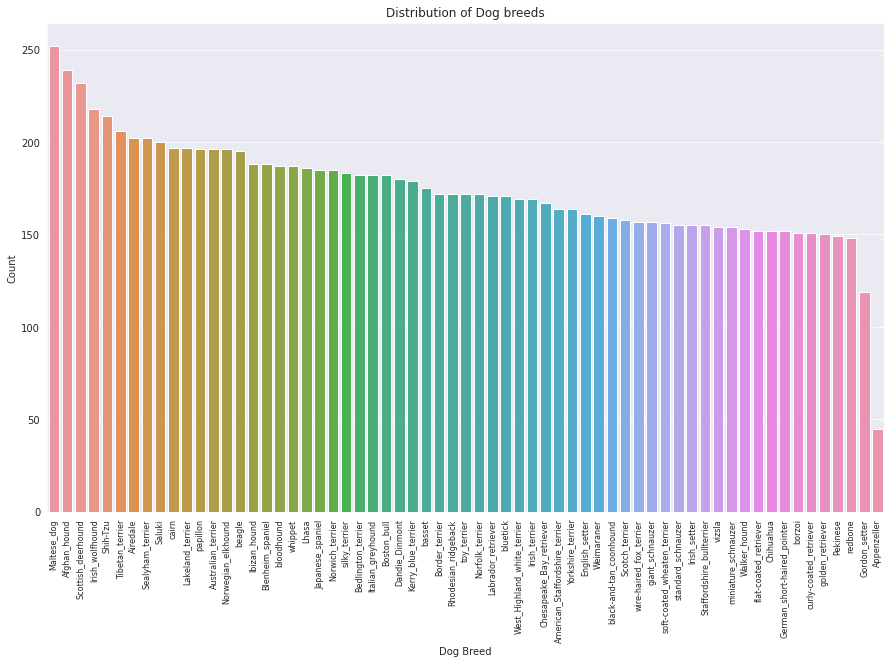

In [92]:
## Plot a barplot for the dog breeds
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
sns.set_style("darkgrid")
d1 = d.sort_values('Count',ascending=False)
ax = sns.barplot(x = d1.Dog, y = d1.Count, data = d1)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of Dog breeds')
plt.show()

To see breeds with the most and least amount of pictures

In [ ]:
d1.head(5)
d1.tail(5)

In [ ]:
# Descriptive analysis of the number of breeds per image
d1.describe()

In [99]:
## Add the average/max/min for image sizes and how this will affect us
path = '/content/drive/MyDrive/Images/'
mn = 20
ImageDetails = pd.DataFrame()
folders = ([name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name)) and name.startswith("")]) # get all directories 
for folder in folders:
  contents = os.listdir(os.path.join(path,folder)) # get list of contents
  folder1 =folder.split("-",1)[1] 
  if len(contents) > mn: # if greater than the limit, print folder and number of contents
    #temp = pd.DataFrame({'Dog': [folder1], 'Count': [len(contents)], })
    for image in contents:
      pic = imageio.imread(path + folder+ "/" + image)
      temp = pd.DataFrame({ 'ID': str(image), 'Breed':folder1 ,'Width': pic.shape[1], 'Height': pic.shape[0],}, index=[0])
      ImageDetails = pd.concat([ImageDetails, temp])
  #print("Folder:" + folder1 + " Complete. ")

In [ ]:
print('Summary of image height and width for all of the photos')
ImageDetails.describe()

In [ ]:
# See top 10 by height
ImageDetailsHeight = ImageDetails.sort_values('Height',ascending=False)
ImageDetailsHeight.head(10)

In [ ]:
# See top 10 by width
ImageDetailsWidth = ImageDetails.sort_values('Width',ascending=False)
ImageDetailsWidth.head(10)

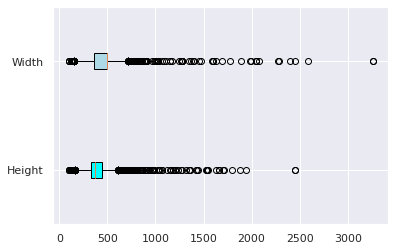

In [112]:
# See distribution of height and width
box_plot_data=[ImageDetails['Height'], ImageDetails['Width']]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Height','Width'],
 )
colors = ['cyan', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

# New Section